<a href="https://www.kaggle.com/mohamedbakrey/mnist-using-different-models-in-deep-learning?scriptVersionId=88368794" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <html> <center>  Introduction.</center></html>
 **In this notebook, many methods and networks that concern and work on deep learning will be explained mainly, as each time a specific idea is added in a different way so that we are able to learn greatly, benefit and benefit from each other. Here, of course, the famous data (MNIST) is used, which is Which we work on all the time. We hope to learn together by adding your opinion in the comments if you see something that should be added to this netbook and do not forget to vote so that everyone can see it and be able to learn.**

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

# Loading Data

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("Train Data:", x_train.shape)
print("Train Data:", y_train.shape)
print("Train Data:", x_test.shape)
print("Train Data:", y_test.shape)

Train Data: (60000, 28, 28)
Train Data: (60000,)
Train Data: (10000, 28, 28)
Train Data: (10000,)


# compute the number of labels

In [4]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [5]:
print("Number Of Labels:",num_labels)

Number Of Labels: 10


In [6]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print("Train after make To_Categorical:", y_train.shape)
print("Test after make To_Categorical:", y_test.shape)


Train after make To_Categorical: (60000, 10)
Test after make To_Categorical: (10000, 10)


In [8]:
# input image dimensions
image_size = x_train.shape[1]

In [9]:
print("Image Size:", image_size)

Image Size: 28


# Resize and Normalize

In [10]:
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])

In [11]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


In [12]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


# Network Parameters

In [14]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# Using CNN 

In [15]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu',
        input_shape=input_shape))


model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

2022-02-21 08:30:06.845087: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Plot the Summary by using plot_model

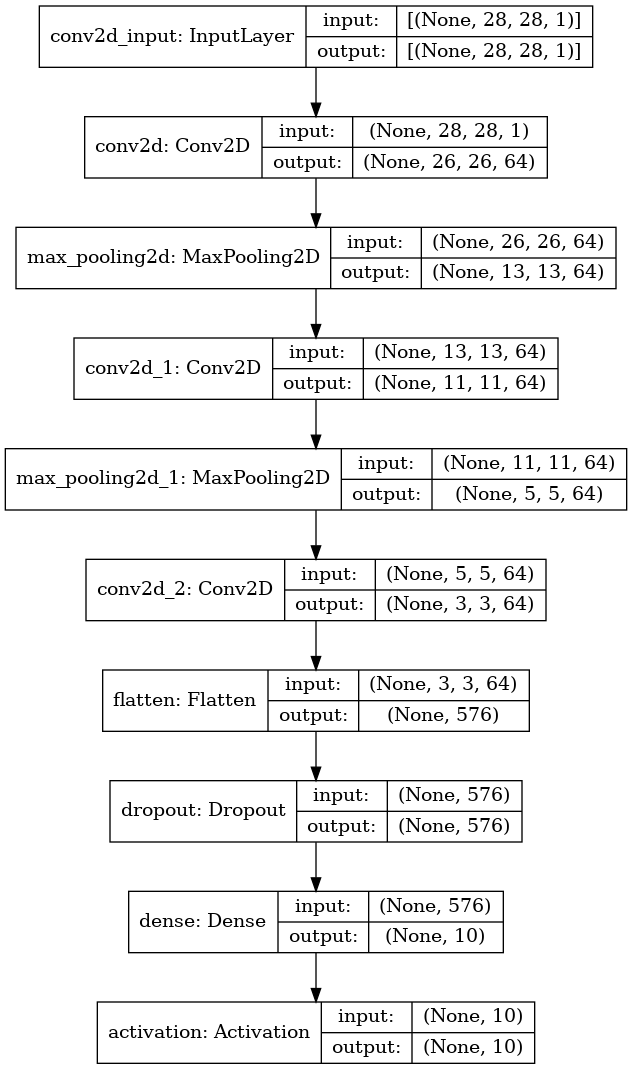

In [16]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [17]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [18]:
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

2022-02-21 08:30:08.435740: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
469/469 [==============================] - 34s 70ms/step - loss: 0.2654 - accuracy: 0.9183
Epoch 2/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0682 - accuracy: 0.9789
Epoch 3/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0492 - accuracy: 0.9847
Epoch 4/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0389 - accuracy: 0.9881
Epoch 5/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0332 - accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 8/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 9/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0196 - accuracy: 0.9941
Epoch 10/10
469/469 [==============================] - 33s 70ms/step - loss: 0.017

In [19]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 2s 21ms/step - loss: 0.0221 - accuracy: 0.9920


In [20]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.2%


# Using RNN Network

In [21]:
# load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [22]:
# compute the number of labels
num_labels = len(np.unique(Y_train))

In [23]:
# convert to one-hot vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [24]:
# resize and normalize
image_size = X_train.shape[1]
X_train = np.reshape(X_train,[-1, image_size, image_size])
X_test = np.reshape(X_test,[-1, image_size, image_size])

In [25]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [26]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [27]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
dropout=dropout,
input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


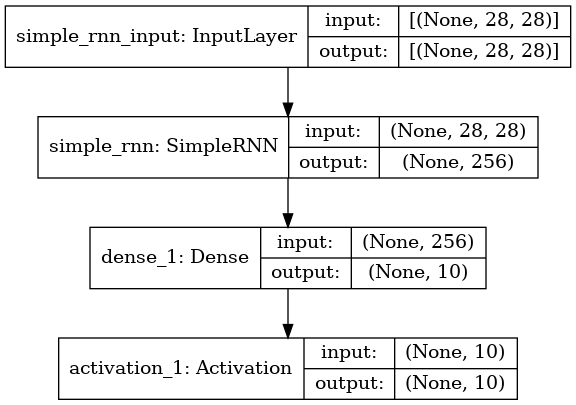

In [28]:
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [29]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])

In [30]:
# train the network
model.fit(X_train, Y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 23s 46ms/step - loss: 0.7590 - accuracy: 0.7775
Epoch 2/20
469/469 [==============================] - 22s 47ms/step - loss: 0.3351 - accuracy: 0.9015
Epoch 3/20
469/469 [==============================] - 21s 45ms/step - loss: 0.2419 - accuracy: 0.9281
Epoch 4/20
469/469 [==============================] - 22s 48ms/step - loss: 0.1947 - accuracy: 0.9415
Epoch 5/20
469/469 [==============================] - 22s 46ms/step - loss: 0.1693 - accuracy: 0.9488
Epoch 6/20
469/469 [==============================] - 21s 45ms/step - loss: 0.1494 - accuracy: 0.9547
Epoch 7/20
469/469 [==============================] - 22s 46ms/step - loss: 0.1333 - accuracy: 0.9594
Epoch 8/20
469/469 [==============================] - 22s 47ms/step - loss: 0.1232 - accuracy: 0.9627
Epoch 9/20
469/469 [==============================] - 22s 46ms/step - loss: 0.1132 - accuracy: 0.9661
Epoch 10/20
469/469 [==============================] - 23s 50ms/step - loss: 0.105

In [31]:
_, acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)


In [32]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.2%


# Using CNN Network By Functinal API 

In [49]:
from tensorflow.keras.layers import Dense, Dropout, Input

In [50]:
# load MNIST dataset
(x2_train, y2_train), (x2_test, y2_test) = mnist.load_data()

In [51]:
# from sparse label to categorical
num_labels = len(np.unique(y2_train))
y2_train = to_categorical(y2_train)
y2_test = to_categorical(y2_test)

In [52]:
print("Trian :",y2_train.shape)
print("Test :",y2_test.shape)

Trian : (60000, 10)
Test : (10000, 10)


In [53]:
# reshape and normalize input images
image_size = x2_train.shape[1]
x2_train = np.reshape(x2_train,[-1, image_size, image_size, 1])
x2_test = np.reshape(x2_test,[-1, image_size, image_size, 1])


In [54]:
print("X2 Trian:",x2_train.shape)
print("X2 Trian:",x2_test.shape)

X2 Trian: (60000, 28, 28, 1)
X2 Trian: (10000, 28, 28, 1)


In [55]:
x2_train = x2_train.astype('float32') / 255
x2_test = x2_test.astype('float32') / 255

In [56]:
# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

##  Use functional API to build cnn layers

In [57]:
# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(y)

# image to vector before connecting to dense layer
y = Flatten()(y)


# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)

In [58]:
# network model in text
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0   

In [59]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [60]:
# train the model with input images and labels
model.fit(x2_train,
                y2_train,
                validation_data=(x2_test, y2_test),
                epochs=20,
                batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 36s 75ms/step - loss: 0.2738 - accuracy: 0.9160 - val_loss: 0.0571 - val_accuracy: 0.9828
Epoch 2/20
469/469 [==============================] - 36s 76ms/step - loss: 0.0756 - accuracy: 0.9765 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 3/20
469/469 [==============================] - 36s 78ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0330 - val_accuracy: 0.9889
Epoch 4/20
469/469 [==============================] - 37s 78ms/step - loss: 0.0443 - accuracy: 0.9868 - val_loss: 0.0273 - val_accuracy: 0.9896
Epoch 5/20
469/469 [==============================] - 36s 76ms/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0300 - val_accuracy: 0.9895
Epoch 6/20
469/469 [==============================] - 36s 76ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0338 - val_accuracy: 0.9887
Epoch 7/20
469/469 [==============================] - 36s 78ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0275 - val_accuracy:

In [62]:
# model accuracy on test dataset
score = model.evaluate(x2_test,
                            y2_test,
                            batch_size=batch_size,
                            verbose=0)

In [63]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.2%
